In [ ]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas as pd


In [ ]:
response= pd.read_csv('Retail_Data_Response.csv')

In [ ]:
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [ ]:
trxn= pd.read_csv('Retail_Data_Transactions.csv')

In [ ]:
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [ ]:
df= trxn.merge(response, on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [ ]:
# features

df.dtypes
df.shape
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [ ]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [ ]:
# MISSING VALUES

df.isnull().sum()


customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [ ]:
31/125000*100

0.024800000000000003

In [ ]:
df=df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [ ]:
# change dtypes
df['trans_date']= pd.to_datetime(df['trans_date'])
df['response']= df ['response'].astype ('int64')

C:\Users\User\AppData\Local\Temp\ipykernel_10720\3970496974.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\User\AppData\Local\Temp\ipykernel_10720\3970496974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\User\AppData\Local\Temp\ipykernel_10720\3970496974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [ ]:
set(df['response'])

{0, 1}

In [ ]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [ ]:
# check for outliers
#Z-SCORE

from scipy import stats
import numpy as np

#calc z score
z_score= np.abs(stats.zscore(df['tran_amount']))

#set a threshold
threshold= 3
outliers= z_score>threshold

print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [ ]:
# check for outliers
#Z-SCORE

from scipy import stats
import numpy as np

#calc z score
z_scores= np.abs(stats.zscore(df['response']))

#set a threshold
threshold = 3

outliers= z_score>threshold

print (df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


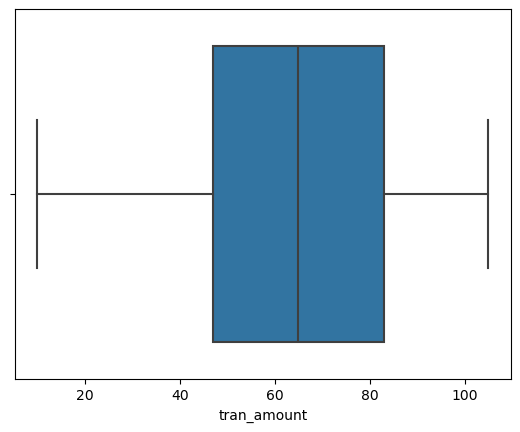

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['tran_amount'])
plt.show()

In [ ]:
# creating new colums
df['month'] = df['trans_date'].dt.month
df

C:\Users\User\AppData\Local\Temp\ipykernel_10720\2422472043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['trans_date'].dt.month


,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [ ]:
# Which 3 months have had the highest transaction amounts?

monthly_sales= df.groupby('month')['tran_amount'].sum()
monthly_sales= monthly_sales.sort_values(ascending=False).reset_index().head(5)
monthly_sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089
3,7,717011
4,12,709795


In [ ]:
# Customers having highest value of orders

customer_counts= df['customer_id'].value_counts().reset_index()
customer_counts.columns= ['customer_id','count']
customer_counts

#sort
#top_5_cust= customer_counts.sort_values(by='count',ascending=False).head(5)
#top_5_cust

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35
...,...,...
6879,CS8559,4
6880,CS7224,4
6881,CS7716,4
6882,CS8504,4


In [ ]:
#sort
top_5_cust= customer_counts.sort_values(by='count',ascending=False).head(5)
top_5_cust

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

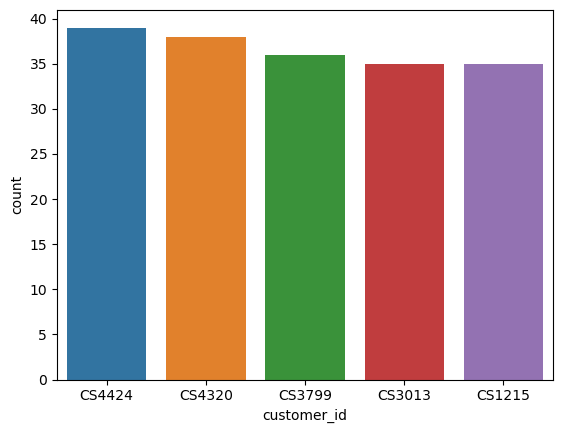

In [ ]:
sns.barplot(x='customer_id',y='count',data=top_5_cust)

In [ ]:
# Customers having highest num of orders

customer_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

,customer_id,tran_amount
0,CS1112,1012
1,CS1113,1490
2,CS1114,1432
3,CS1115,1659
4,CS1116,857
...,...,...
6879,CS8996,582
6880,CS8997,543
6881,CS8998,624
6882,CS8999,383


In [ ]:
#sort
top_5_sales= customer_sales.sort_values(by='tran_amount', ascending=False).head(5)
top_5_sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

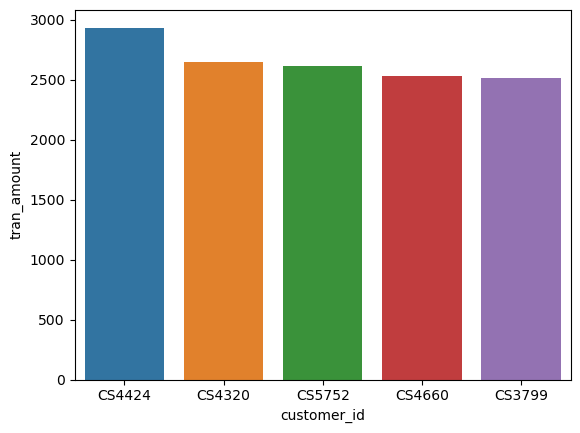

In [ ]:
sns.barplot(x='customer_id',y='tran_amount',data=top_5_sales)

In [ ]:
## times series analysis

C:\Users\User\AppData\Local\Temp\ipykernel_10720\1021291461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']=df['trans_date'].dt.to_period('M')


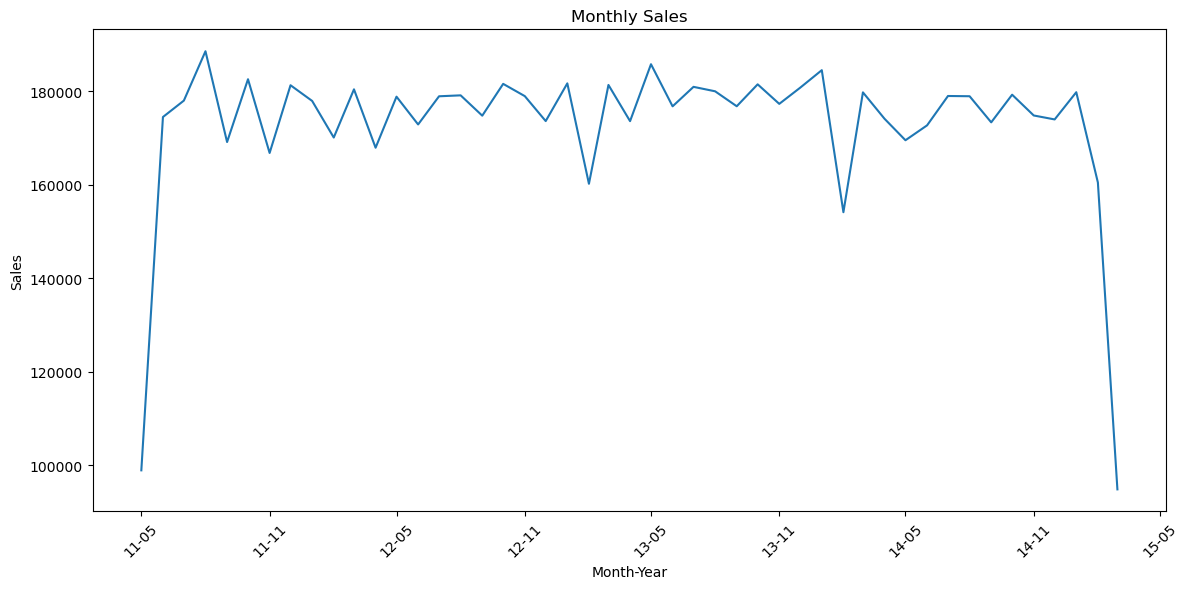

In [ ]:
import matplotlib.dates as mdates
df['month_year']=df['trans_date'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index= monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
### cohort segmentattion

In [ ]:
#Recency
recency= df.groupby('customer_id')['trans_date'].max()

#Frequency
frequency= df.groupby('customer_id')['trans_date'].count()

#Monetary
monetary= df.groupby('customer_id')['tran_amount'].sum()

rfm= pd.DataFrame({'recency':recency, 'frequency':frequency,'monetary':monetary})

In [ ]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [ ]:
#customer segmatation

In [ ]:
def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
       return 'PO'
    elif(2011<=row['recency'].year<2012 and (10<row['frequency']<15) and (500<=row['monetary']<=1000)):
      return 'P1'
    else:
      return 'P2'
rfm ['segment']= rfm.apply(segment_customer, axis=1)
rfm

,recency,frequency,monetary,segment
customer_id,,,,
CS1112,2015-01-14,15,1012,PO
CS1113,2015-02-09,20,1490,PO
CS1114,2015-02-12,19,1432,PO
CS1115,2015-03-05,22,1659,PO
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


In [ ]:
##churn analysis

<Axes: xlabel='response'>

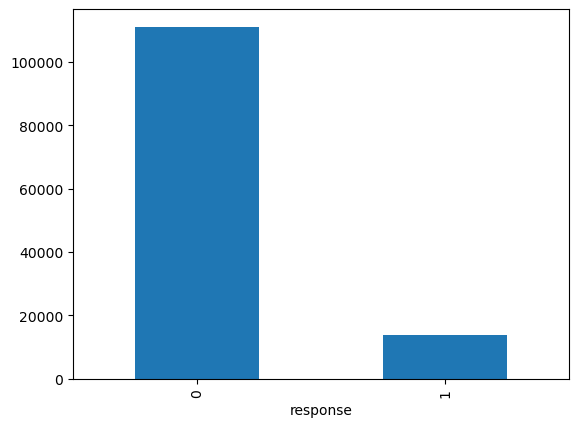

In [ ]:
#count the number of churned and active customers
churn_counts= df ['response'].value_counts()

#Plot
churn_counts.plot(kind='bar')

In [ ]:
##Analyzing top customers

<Axes: xlabel='month_year'>

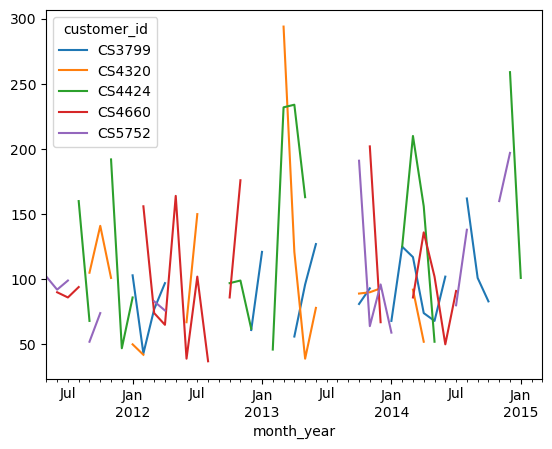

In [ ]:
top_5_cust= monetary.sort_values(ascending=False).head(5).index
top_customers_df= df[df['customer_id'].isin(top_5_cust)]
top_customers_sales = top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customers_sales.plot(kind='line')

In [ ]:
df.to_csv('MainData.csv')

In [ ]:
rfm.to_csv('AddAnlys.csv')